<h1>LAB 05</h1>

In [1]:
import pandas as pd 
import re
import random
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt 
import math
from IPython.display import clear_output

<h3>1.  Read the dataset into a dataframe and explore</h3>

In [2]:
df = pd.read_csv("spam.csv", encoding="Latin-1")

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [5]:
df.columns = ['Category', 'Message']

In [6]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3>2. Clean the data</h3>

In [7]:
clean = df.replace(to_replace ='[^A-Za-z" "]', value = "", regex = True)
clean['Message'] = clean['Message'].apply(lambda x: x.lower())

In [8]:
clean


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>

In [9]:
train_data = clean.sample(frac = 0.75, random_state = 1)
test_data = clean.drop(train_data.index)
test_data.head(5)

,Category,Message
0,ham,go until jurong point crazy available only in ...
2,spam,free entry in a wkly comp to win fa cup final...
14,ham,i have a date on sunday with will
15,spam,xxxmobilemovieclub to use your credit click th...
18,ham,fine if thats the way u feel thats the way its...


<h3>4. Create a Word Frequency DataFrame</h3>

In [10]:
words_present = {}
for i in train_data.index:
    for word in train_data.loc[i]["Message"].split():
        if word not in words_present:
            if train_data.loc[i]["Category"] == "spam":
                words_present[word] = [1,0]
            else:
                words_present[word] = [0,1]
        else:
            if train_data.loc[i]["Category"] == "spam":
                words_present[word][0]+=1
            else:
                words_present[word][1]+=1

In [11]:
word_freq = pd.DataFrame.from_dict(words_present).transpose()\
            .reset_index()\
            .rename(columns={0:"#Spam",1:"#Ham","index":"Word"})
word_freq = word_freq.sort_values(by='#Ham', ascending = False, ignore_index = True)
word_freq

,Word,#Spam,#Ham
0,i,44,1608
1,you,221,1360
2,to,533,1152
3,the,155,819
4,a,298,782
...,...,...,...
7322,president,1,0
7323,accordingly,1,0
7324,stopsmsppm,1,0
7325,wwwtextcompcom,2,0


<h3>5. Visualise the Data</h3>

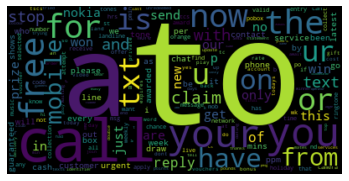

In [12]:
spam_freq = {}
for row in word_freq.index:
    spam_freq[word_freq.loc[row]["Word"]] = word_freq.loc[row]["#Spam"]
wordcloud = wc() 
wordcloud.generate_from_frequencies(spam_freq)
plt.figure() 
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.axis("off") 
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>

In [13]:
words_present = {}
for i in train_data.index:
    m = 0
    for word in train_data.loc[i]["Message"].split():
        m+=1
        k = 0
        n = 0
        for j in train_data.loc[i]["Message"].split():
            n += 1
            if n < m:
                continue
            if (j == word):
                k+=1
        if(k > 1):
            continue
        if word not in words_present:
            if train_data.loc[i]["Category"] == "spam":
                words_present[word] = [1,0]
            else:
                words_present[word] = [0,1]
        else:
            if train_data.loc[i]["Category"] == "spam":
                words_present[word][0]+=1
            else:
                words_present[word][1]+=1
                
word_prob = pd.DataFrame.from_dict(words_present).transpose()\
            .reset_index()\
            .rename(columns={0:"P(E|S)",1:"P(E|¬S)","index":"Word"})
word_prob = word_prob.sort_values(by='P(E|¬S)', ascending = False, ignore_index = True)

tot_spam = 0
tot_ham = 0
for i in train_data.index:
    if train_data.loc[i]["Category"] == "spam":
        tot_spam +=1
    else:
        tot_ham +=1
tot_spam = tot_spam + 1
tot_ham = tot_ham + 1

word_prob["P(E|S)"] = (word_prob["P(E|S)"] + 0.5)/tot_spam
word_prob["P(E|¬S)"] = (word_prob["P(E|¬S)"] + 0.5)/tot_ham
    
word_prob 

,Word,P(E|S),P(E|¬S)
0,i,0.065104,0.316921
1,you,0.308160,0.267268
2,to,0.631076,0.249792
3,a,0.398438,0.178502
4,the,0.210938,0.174341
...,...,...,...
7322,onto,0.013021,0.000139
7323,national,0.018229,0.000139
7324,ppmsg,0.002604,0.000139
7325,sue,0.002604,0.000139


<h3>7. Checking the 'spamliness' of a single word</h3>

In [14]:
word = "arun"
ps = 0.05
p_not_s = 0.95
pes = float(word_prob["P(E|S)"].loc[word_prob['Word'] == word].to_string(index=False))
pe_not_s = float(word_prob["P(E|¬S)"].loc[word_prob['Word'] == word].to_string(index=False))
pse = (pes*ps)/((pes*ps)+(pe_not_s*p_not_s))
p_not_se = (pe_not_s*p_not_s)/((pes*ps)+(pe_not_s*p_not_s))
print("Word = ",word)
print("P(E|S) =",word_prob["P(E|S)"].loc[word_prob['Word'] == word].to_string(index=False))
print("P(E|¬S) =",word_prob["P(E|¬S)"].loc[word_prob['Word'] == word].to_string(index=False))
print("P(S|E) =",pse)
print("P(¬S|E)=",p_not_se)


Word =  arun
P(E|S) =  0.000868
P(E|¬S) =  0.000693
P(S|E) = 0.06184538653366583
P(¬S|E)= 0.9381546134663342


<h3>8. Checking the 'spamliness' of several words</h3>

In [15]:
prob_spam = []
prob_ham = []
k = 0
message = "Pooja what is this behaviour ?"
message = message.lower()
message = message.split()
for i in message:
    for j in word_prob.index:
        if(word_prob.loc[j]["Word"] == i):
            pes = float(word_prob.loc[j]["P(E|S)"])
            pe_not_s = float(word_prob.loc[j]["P(E|¬S)"])
            pse = (pes*ps)/((pes*ps)+(pe_not_s*p_not_s))
            p_not_se = (pe_not_s*p_not_s)/((pes*ps)+(pe_not_s*p_not_s))
            prob_spam.append(pse)
            prob_ham.append(p_not_se)
            k += 1
            break
                 

In [16]:
spam_res = 1
ham_res = 1
for i in prob_spam:
    spam_res = spam_res*i
for i in prob_ham:
    ham_res = ham_res*i
if spam_res > ham_res:
    print("Its a spam message")
else :
    print("Its not a spam message ")

Its not a spam message 


<h3>9. Avoiding floating point underflow</h3>

In [17]:
prob_spam = []
prob_ham = []
prob_spam.append(math.log(ps))
prob_ham.append(math.log(p_not_s))
message = "Pooja what is this behaviour ?"
message = message.lower()
message = message.split()
for i in message:
    for j in word_prob.index:
        if(word_prob.loc[j]["Word"] == i):
            pes = float(word_prob.loc[j]["P(E|S)"])
            pe_not_s = float(word_prob.loc[j]["P(E|¬S)"])
            prob_spam.append(math.log(pes))
            prob_ham.append(math.log(pe_not_s))
            break

In [18]:
spam_res = 0
ham_res = 0
for i in prob_spam:
    spam_res = spam_res+i
for i in prob_ham:
    ham_res = ham_res+i
if spam_res > ham_res:
    print("Its a spam message")
else :
    print("Its not a spam message ")

Its not a spam message 


<h3>10. Testing the Model</h3>

In [19]:
k = 0
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0
for mess in test_data.index:
    k += 1
    per = int((k/len(test_data))*100)
    print(per ," % done")
    clear_output(wait=True)
    prob_spam = []
    prob_ham = []
    prob_spam.append(math.log(ps))
    prob_ham.append(math.log(p_not_s))
    message = test_data.loc[mess]["Message"]
    message = message.split()
    for i in message:
        for j in word_prob.index:
            if(word_prob.loc[j]["Word"] == i):
                pes = float(word_prob.loc[j]["P(E|S)"])
                pe_not_s = float(word_prob.loc[j]["P(E|¬S)"])
                prob_spam.append(math.log(pes))
                prob_ham.append(math.log(pe_not_s))
                break
    spam_res = 0
    ham_res = 0
    for i in prob_spam:
        spam_res = spam_res+i
    for i in prob_ham:
        ham_res = ham_res+i
    if spam_res > ham_res:
        if test_data.loc[mess]["Category"] == "spam":
            match_spam += 1
        else:
            thought_ham_is_spam += 1
        
    else :
        if test_data.loc[mess]["Category"] == "ham":
            match_ham += 1
        else:
            thought_spam_is_ham += 1
acc = ((match_spam+match_ham)/(match_spam+match_ham+thought_ham_is_spam+thought_spam_is_ham))
print("match_spam = ", match_spam)
print("match_ham = ", match_ham)
print("thought_ham_is_spam = ",thought_ham_is_spam)
print("thought_spam_is_ham = ",thought_spam_is_ham)
print("Accuracy: ",acc)

match_spam =  170
match_ham =  1155
thought_ham_is_spam =  66
thought_spam_is_ham =  2
Accuracy:  0.9511844938980617


<h3>11. Improvements</h3>

The accuracy of the can be improved by feeding more data for testing. Also we can consider checking for phases which repeatedly occur in spam messages. Spam messages usually contain phone numbers which can be used as a criteria for further classification.